## https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
source = 'https://raw.githubusercontent.com/nparis87/MachineLearning/main/Complete.csv'

data = pd.read_csv(source, sep=';')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Set
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Train
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Train
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Train
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Train
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Train


In [5]:
X = data.drop(['ID','Spending_Score', 'Set'],axis=1)
Y = data['Spending_Score']

## Algunas transformaciones importantes

In [6]:
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

In [11]:
estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ('normalize',MinMaxScaler()),
              ]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder()), ('normalize', MinMaxScaler())])

In [13]:
data_mod = pd.DataFrame(pipe.fit_transform(X),columns=X.columns)
data_mod.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size
0,1.0,0.0,0.060606,0.0,0.625,0.071429,0.375
1,0.0,1.0,0.272727,1.0,0.250,0.071429,0.250
2,0.0,1.0,0.666667,1.0,0.250,0.071429,0.000
3,1.0,1.0,0.666667,1.0,0.875,0.000000,0.125
4,0.0,1.0,0.303030,1.0,0.375,0.071429,0.625


## Entrenar el modelo

In [15]:
X = pipe.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [18]:
pred = knn.predict(X)
pred

array([2, 0, 2, ..., 2, 1, 2])

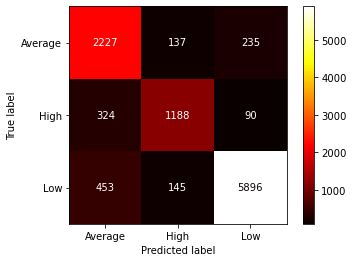

In [16]:
plot_confusion_matrix(knn,X,Y,display_labels=le.classes_,values_format='d',cmap='hot')

In [19]:
print('----------Reporte para el Modelo 1----------')
print(classification_report(Y,pred,target_names=le.classes_))

----------Reporte para el Modelo 1----------
              precision    recall  f1-score   support

     Average       0.74      0.86      0.79      2599
        High       0.81      0.74      0.77      1602
         Low       0.95      0.91      0.93      6494

    accuracy                           0.87     10695
   macro avg       0.83      0.84      0.83     10695
weighted avg       0.88      0.87      0.87     10695



## Trabajo en Clase

Imprimir la matriz de confusión de la regresión logística de clasificación de créditos vista en la clase anterior